In [38]:
import sys
import collections
import itertools
import numpy as np
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.spatial.distance import squareform
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from fastdtw import fastdtw

plt.style.use('bmh')
%matplotlib inline

def dtw_distance(ts_1, ts_2):    
    distance, path = fastdtw(ts_1, ts_2, dist=euclidean)
    return distance
      
    
def dist_matrix(x, y):
    x_s = np.shape(x)
    y_s = np.shape(y)
    dm = np.zeros((x_s[0], y_s[0])) 
    dm_size = x_s[0]*y_s[0]
    for a in range(0,x_s[0]):
        for b in range(0,y_s[0]):
            dm[a][b] = dtw_distance(x[a], y[b]);
    return dm


### Calculate and visualize distance btw 2 series

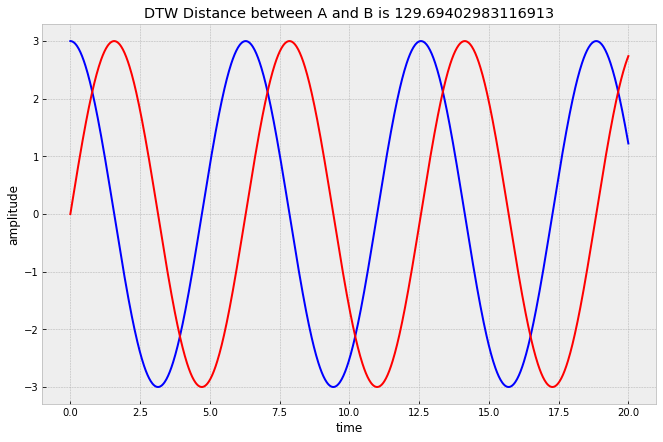

In [39]:
time = np.linspace(0,20,1000)
amplitude_a = 3*np.cos(time)
amplitude_b = 3*np.sin(time)
plt.figure(figsize=(11,7))
distance = dtw_distance(amplitude_a, amplitude_b)
plt.title("DTW Distance between A and B is "+str(distance))
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(time, amplitude_a, c='blue')
plt.plot(time, amplitude_b, c='red')

plt.show()


### Test dist_matrix function

In [40]:
array1 = np.random.random((4,50))
array2 = np.random.random((4,50))     
print(dist_matrix(array1,array2))

[[ 8.29276121 10.84199263  9.14961134 11.44427111]
 [ 9.84344302  9.51213758  9.93072072 10.89606602]
 [10.29493744 11.33051542 10.14639055 12.4526224 ]
 [ 9.96936288 10.2894549   9.34216238 11.50109611]]


### Implement KNN classification

In [51]:
class KNN(object):
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    
    def fit(self, x, l):
        self.trainging_x = x
        self.training_label = l

    def predict(self, x):
        matrix = dist_matrix(x, self.trainging_x)
        knn_labels = []
        label_array = []
        probability_array = []
        for i in range(0,len(matrix)):
            l = np.argsort(matrix[i])
            for a in range(0,self.n_neighbors):
                label = self.training_label[l[a]]
                knn_labels.append(label)
                print(label)
            mode_data = mode(knn_labels)
            mode_label = mode_data[0]
            mode_proba = mode_data[1]/self.n_neighbors
            label_array.append(mode_label)
            probability_array.append(mode_proba)
        return label_array, probability_array


## Human Activity Recognition Dataset

In [42]:
x_train_file = open('data/X_train.txt', 'r')
y_train_file = open('data/y_train.txt', 'r')

x_test_file = open('data/X_test.txt', 'r')
y_test_file = open('data/y_test.txt', 'r')

x_train = []
y_train = []
x_test = []
y_test = []

labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}

for x in x_train_file:
    x_train.append([float(ts) for ts in x.split()])
    
for y in y_train_file:
    y_train.append(int(y.rstrip('\n')))
    
for x in x_test_file:
    x_test.append([float(ts) for ts in x.split()])
    
for y in y_test_file:
    y_test.append(int(y.rstrip('\n')))
    
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


#### Visualizing sample activities from the HAR dataset

<Figure size 792x504 with 0 Axes>

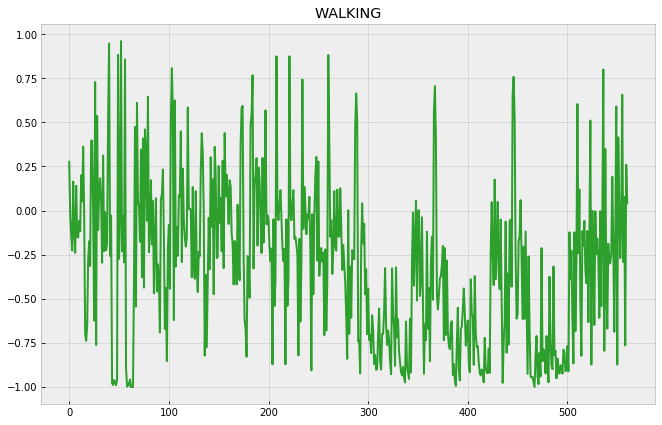

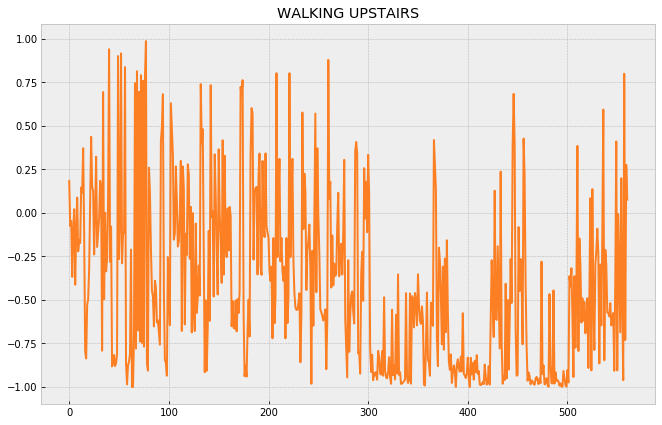

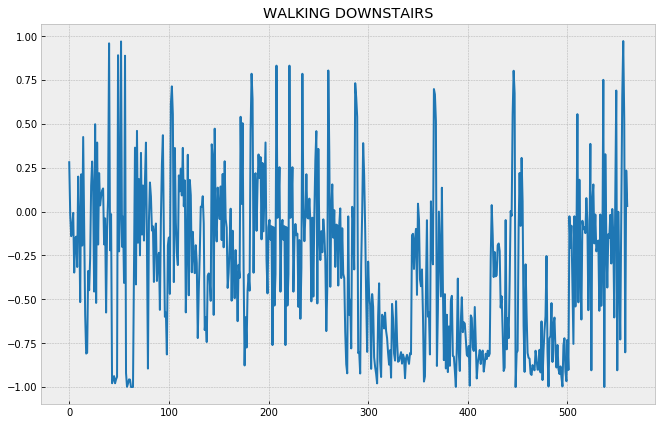

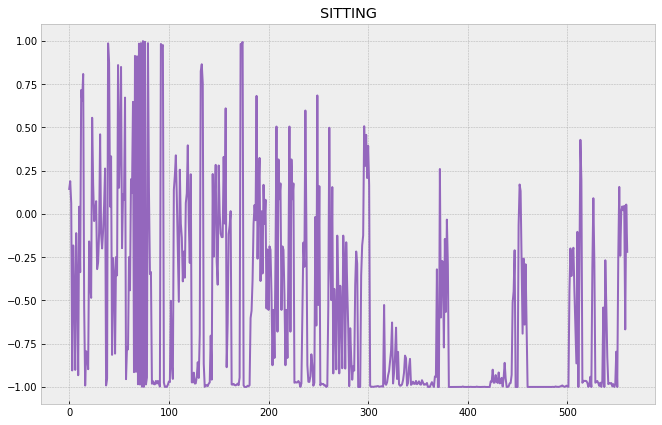

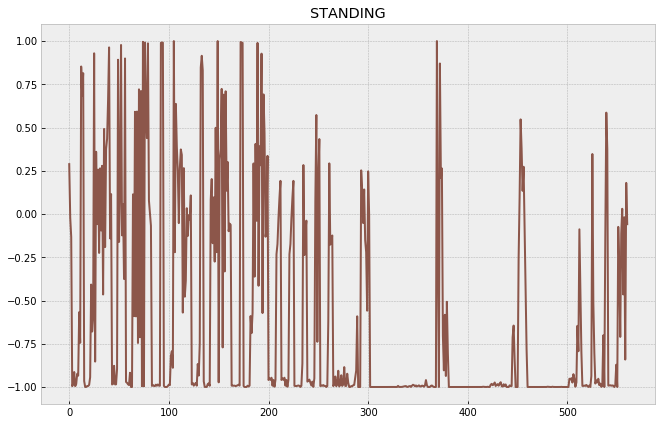

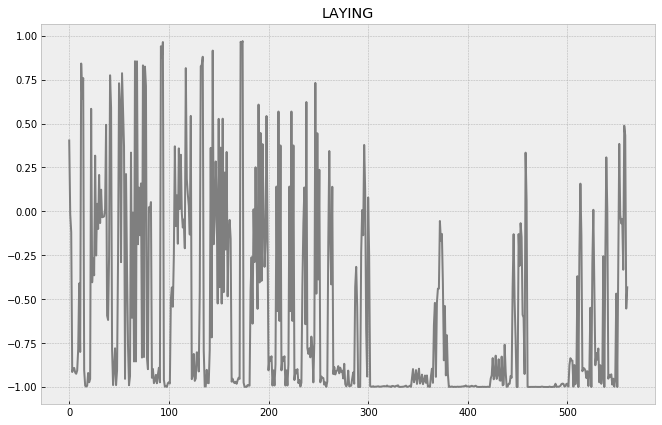

In [43]:
plt.figure(figsize=(11,7))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

activities = []
activity_labels = []
for i in range(1,7):
    plt.figure(figsize=(11,7))
    d = x_train[np.where(y_train == i)[0][0]]
    activities.append(d);
    activity_labels.append(labels[i])
    plt.plot(d, colors[i])
    plt.title(labels[i])
    plt.show()


In [52]:
m = KNN(n_neighbors=1)
m.fit(x_train, y_train)
label, proba = m.predict(x_test)

5
5
6
2
3
1
2
2


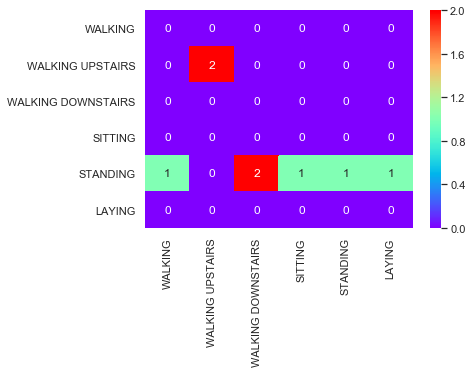

In [54]:
conf_mat = confusion_matrix(label, y_test)



sns.set()
sns.heatmap(conf_mat, annot=True, cmap="rainbow", yticklabels=labels.values(), xticklabels=labels.values())